In [1]:
# CIFAR-10 image classification using Convolution Neural Network
#In this notebook we will show:
#- Gather CIFAR-10 data
#- Use MLP-ANN model to train on CIFAR-10 data and measure its performance
#- Use CNN model to train on CIFAR-10 data  measure it's performance and then compare the same with MLP-ANN

In [2]:
#Understanding the data

In [3]:
!pip install tensorflow

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Input, Model
import matplotlib.pyplot as plt

In [5]:
#1.1 Download and prepare the CIFAR10 datasets

In [6]:
#There are total 60000 color (RGB) images in 10 classes with 6000 images in each class.
#The dataset is divided into 50000 training and 10000 testing images.

In [7]:
(training_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [8]:
#1.2 Normalize the pixel value

In [9]:
training_images, test_images = training_images/255.0, test_images/255.0

In [10]:
test_images.shape

(10000, 32, 32, 3)

In [11]:
### Visualize the data

In [12]:
class_name = ['airplane','automoile','bird','çat','deer','dog','frog','horse','ship','truck']

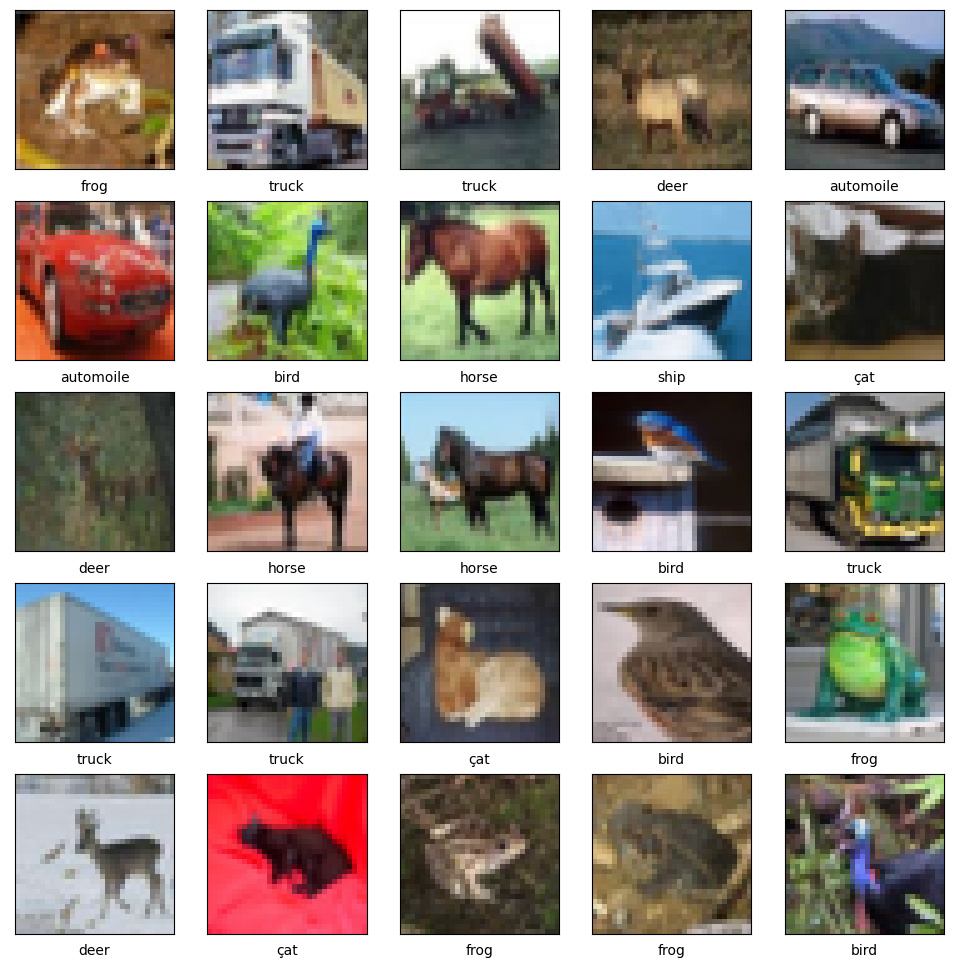

In [13]:
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_images[i])
    plt.xlabel(class_name[train_labels[i][0]])
plt.show()

In [14]:
###Deep dive into any one particular image

In [15]:
import numpy as np

In [16]:
training_images.shape

(50000, 32, 32, 3)

In [17]:
index = np.random.randint(low=0, high=training_images.shape[0], size=1)[0]
index

37798

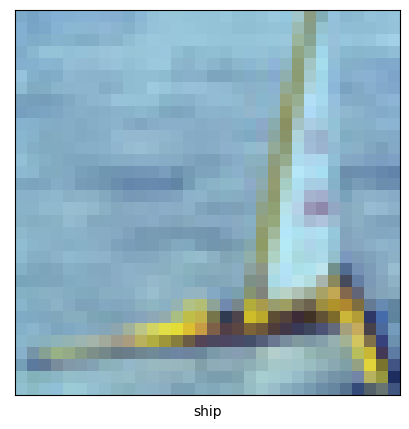

In [18]:
img = training_images[index]

plt.figure(figsize=(5,5))
plt.imshow(img)
plt.xlabel(class_name[train_labels[index][0]])
plt.xticks([])
plt.yticks([])
plt.show()

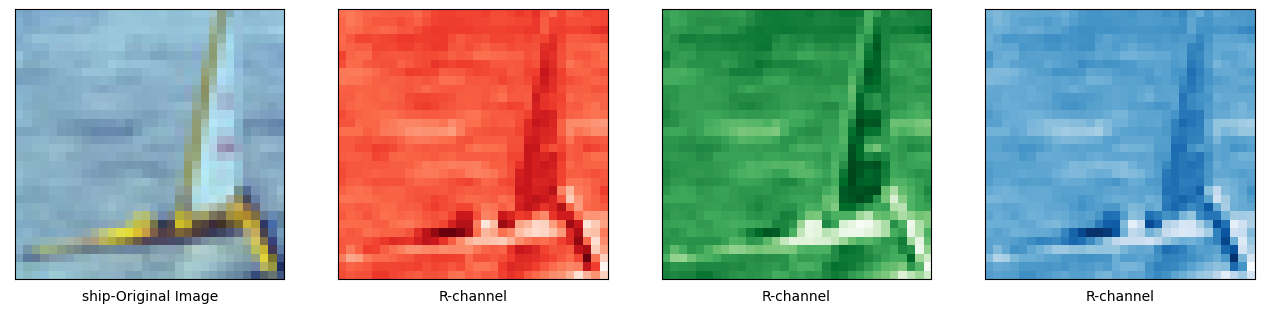

In [19]:
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
plt.imshow(img)
plt.xlabel(class_name[train_labels[index][0]] + "-Original Image")
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,2)
plt.imshow(img[:,:,0], cmap='Reds')
plt.xlabel("R-channel")
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,3)
plt.imshow(img[:,:,1], cmap='Greens')
plt.xlabel("R-channel")
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,4)
plt.imshow(img[:,:,0], cmap='Blues')
plt.xlabel("R-channel")
plt.xticks([])
plt.yticks([])

plt.show()

In [20]:
## MLP model

In [21]:
# Prepare the data for MLP model

In [22]:
X_train_mlp = training_images.reshape(training_images.shape[0],-1)

In [23]:
X_train_mlp.shape

(50000, 3072)

In [24]:
X_test_mlp = test_images.reshape(test_images.shape[0],-1)
X_test_mlp.shape

(10000, 3072)

In [25]:
## Crate the MLP-ANN model

In [26]:
#The input layer will have 3072 nodes
#There will be three hidden layers
#Hidden_layer_1: It will have 1600 nodes with ReLU activation.
#Hidden_Layer_2: It will have 800 nodes with ReLU activation.
#Hidden_layer_3: It will have 100 nodes with ReLU activation.
#Finally there will be classification layer (Softmax layer). There are 10 classes. Hense, 10 output nodes.

In [27]:
ip = Input(shape=X_train_mlp.shape[-1])
h1 = layers.Dense(1600, activation='relu')(ip)
h2 = layers.Dense(800, activation='relu')(h1)
h3 = layers.Dense(100, activation='relu')(h2)
op = layers.Dense(10, activation='softmax')(h3)

In [28]:
mlp_model = Model(inputs = ip, outputs = op)

In [29]:
mlp_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense (Dense)               (None, 1600)              4916800   
                                                                 
 dense_1 (Dense)             (None, 800)               1280800   
                                                                 
 dense_2 (Dense)             (None, 100)               80100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 6,278,710
Trainable params: 6,278,710
Non-trainable params: 0
_________________________________________________________________


In [30]:
#Compile the model

In [31]:
mlp_model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])

In [32]:
#Train the model

In [33]:
history = mlp_model.fit(X_train_mlp, train_labels, epochs=20, batch_size=128, 
                       validation_data=(X_test_mlp, test_labels), validation_batch_size=128)

Epoch 1/20
391/391 [==============================] - 56s 139ms/step - loss: 1.9664 - accuracy: 0.2929 - val_loss: 1.7416 - val_accuracy: 0.3725
Epoch 2/20
391/391 [==============================] - 54s 139ms/step - loss: 1.6958 - accuracy: 0.3937 - val_loss: 1.6615 - val_accuracy: 0.3999
Epoch 3/20
391/391 [==============================] - 54s 137ms/step - loss: 1.6068 - accuracy: 0.4248 - val_loss: 1.5491 - val_accuracy: 0.4493
Epoch 4/20
391/391 [==============================] - 54s 139ms/step - loss: 1.5287 - accuracy: 0.4547 - val_loss: 1.5427 - val_accuracy: 0.4494
Epoch 5/20
391/391 [==============================] - 55s 140ms/step - loss: 1.4884 - accuracy: 0.4661 - val_loss: 1.4635 - val_accuracy: 0.4837
Epoch 6/20
391/391 [==============================] - 57s 146ms/step - loss: 1.4458 - accuracy: 0.4858 - val_loss: 1.4834 - val_accuracy: 0.4713
Epoch 7/20
391/391 [==============================] - 56s 142ms/step - loss: 1.4110 - accuracy: 0.4958 - val_loss: 1.4392 - val_ac

In [34]:
#Evaluate the model performance

In [35]:
#Accuracy vs Epochs plot

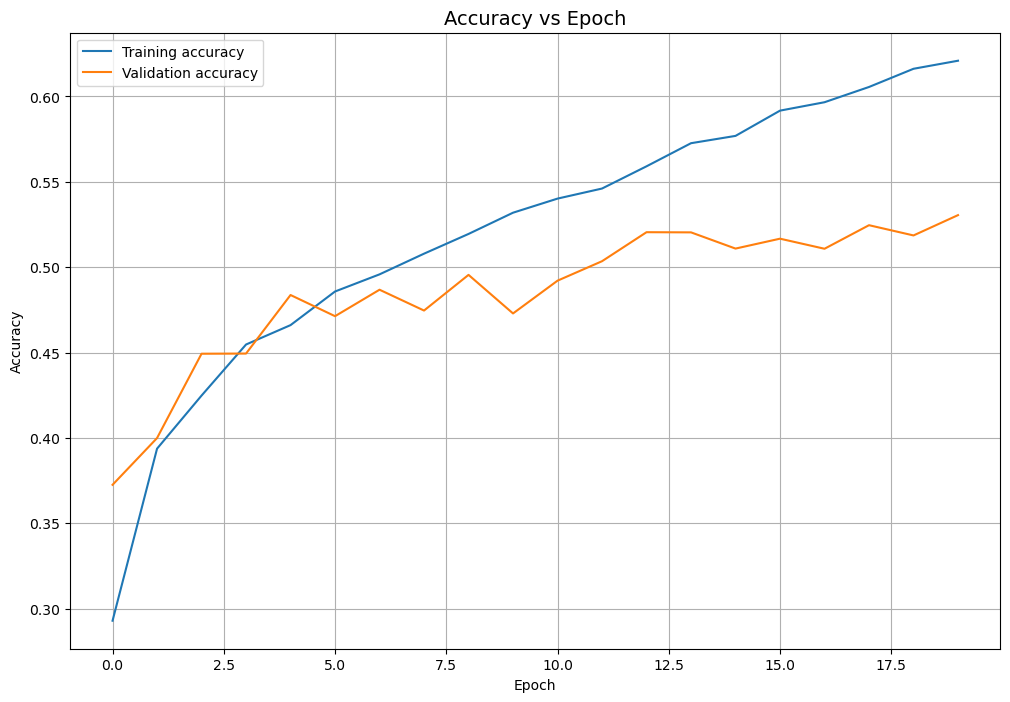

In [37]:
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.title("Accuracy vs Epoch", fontsize=14)
plt.show()

In [38]:
#Loss vs Epochs plot

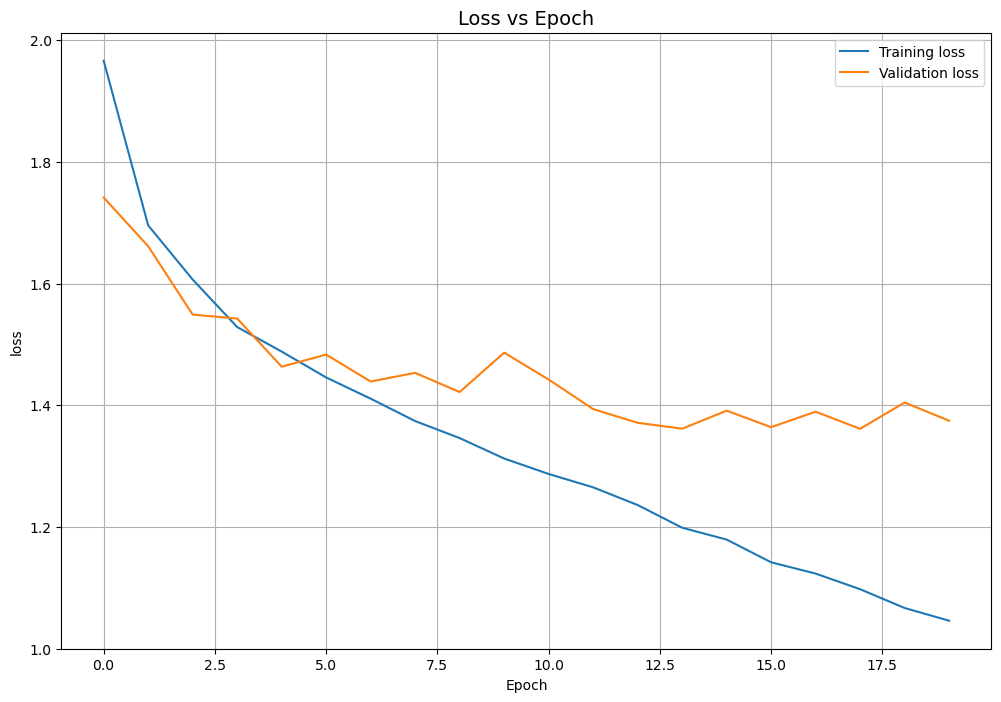

In [39]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.grid()
plt.legend()
plt.title("Loss vs Epoch", fontsize=14)
plt.show()

In [40]:
#Evaluation on test dataset

In [41]:
test_loss_mlp, test_accuracy_mlp = mlp_model.evaluate(X_test_mlp, test_labels, verbose=2)

313/313 - 5s - loss: 1.3747 - accuracy: 0.5305 - 5s/epoch - 15ms/step


In [42]:
print(f"Test accuracy of MLP model: {round(100*test_accuracy_mlp, 2)}%")

Test accuracy of MLP model: 53.05%


In [43]:
print(f"Test loss of MLP model: {round(test_loss_mlp, 2)}")

Test loss of MLP model: 1.37


In [44]:
#CNN model

In [46]:
#Create the CNN model

In [47]:
ip = Input(shape=training_images[0].shape)
conv1 = layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(ip)
maxpool1 = layers.MaxPool2D((2,2))(conv1)
conv2 = layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu')(maxpool1)
maxpool2 = layers.MaxPool2D((2,2))(conv2)
conv3 = layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu')(maxpool2)
flat = layers.Flatten()(conv3)
dense = layers.Dense(64, activation='relu')(flat)
op = layers.Dense(10, activation='softmax')(dense)

In [48]:
cnn_model = Model(inputs=ip, outputs=op)

In [49]:
cnn_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 64)          3692

In [50]:
#Compile the model

In [51]:
cnn_model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])

In [52]:
#train the model

In [53]:
history_cnn = cnn_model.fit(training_images, train_labels, epochs=20, batch_size=128, 
                            validation_data=(test_images, test_labels), validation_batch_size=128)

Epoch 1/20
391/391 [==============================] - 63s 158ms/step - loss: 1.6181 - accuracy: 0.4131 - val_loss: 1.3233 - val_accuracy: 0.5223
Epoch 2/20
391/391 [==============================] - 61s 156ms/step - loss: 1.2553 - accuracy: 0.5536 - val_loss: 1.2089 - val_accuracy: 0.5729
Epoch 3/20
391/391 [==============================] - 61s 156ms/step - loss: 1.0952 - accuracy: 0.6142 - val_loss: 1.0300 - val_accuracy: 0.6394
Epoch 4/20
391/391 [==============================] - 62s 158ms/step - loss: 0.9850 - accuracy: 0.6561 - val_loss: 0.9777 - val_accuracy: 0.6560
Epoch 5/20
391/391 [==============================] - 63s 162ms/step - loss: 0.9027 - accuracy: 0.6843 - val_loss: 0.9646 - val_accuracy: 0.6602
Epoch 6/20
391/391 [==============================] - 62s 158ms/step - loss: 0.8398 - accuracy: 0.7065 - val_loss: 0.8749 - val_accuracy: 0.6943
Epoch 7/20
391/391 [==============================] - 61s 156ms/step - loss: 0.7897 - accuracy: 0.7246 - val_loss: 0.8629 - val_ac

In [54]:
#Evaluate the model performance

In [55]:
#Accuracy vs Epochs plot

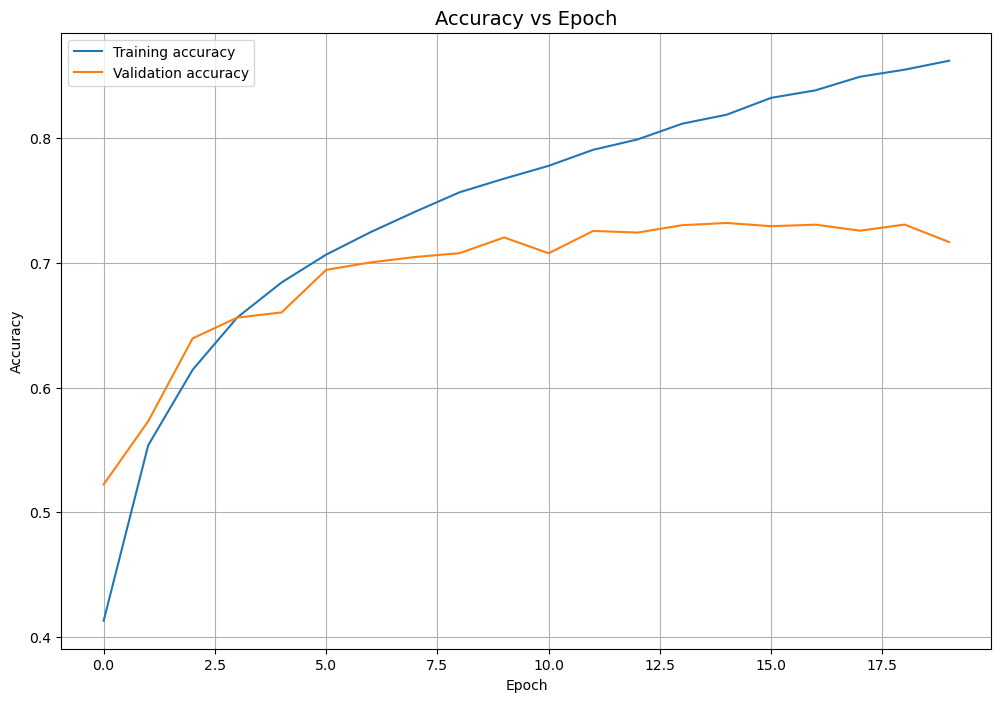

In [56]:
plt.figure(figsize=(12,8))
plt.plot(history_cnn.history['accuracy'], label='Training accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.title("Accuracy vs Epoch", fontsize=14)
plt.show()

In [57]:
#Loss vs Epochs plot

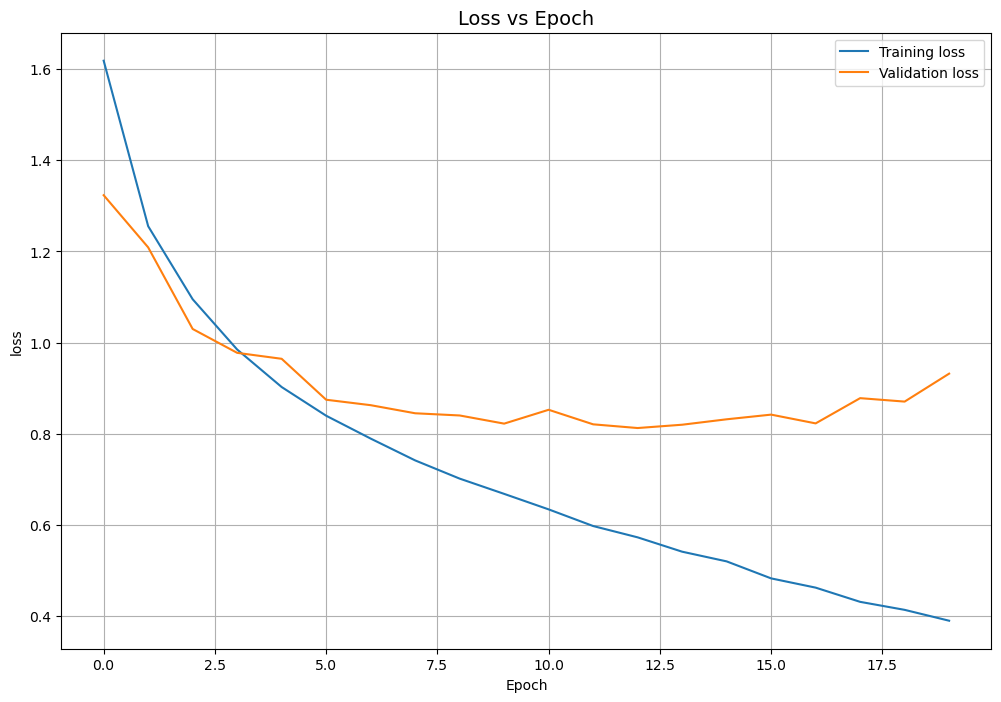

In [58]:
plt.figure(figsize=(12,8))
plt.plot(history_cnn.history['loss'], label='Training loss')
plt.plot(history_cnn.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.grid()
plt.legend()
plt.title("Loss vs Epoch", fontsize=14)
plt.show()

In [59]:
#Evaluation on the test dataset

In [60]:
test_loss_cnn, test_accuracy_cnn = cnn_model.evaluate(test_images, test_labels, verbose=2)

313/313 - 5s - loss: 0.9321 - accuracy: 0.7166 - 5s/epoch - 15ms/step


In [61]:
print(f"Test accuracy of CNN model: {round(100*test_accuracy_cnn, 2)}%")

Test accuracy of CNN model: 71.66%


In [62]:
print(f"Test loss of CNN model: {round(test_loss_cnn, 2)}")

Test loss of CNN model: 0.93


In [63]:
###Conclusion

In [ ]:
#CNN model outperforms MLP model in the task of image classification.